# Data preprocessing on Tibia data

In [41]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# load test data
test_data = pd.read_csv('../data_file/test_set.csv')

In [57]:
# print test data
test_data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
0,ID_1,15385.458333,15472.5,6357.250488,0.413973,0.017592,0.111930,2.108410,0.478124,1.108410,...,444.535442,1934.5,1.0,170.507074,0.086972,0.0,29.952211,3.963248,0.086972,1
1,ID_2,19539.729167,19651.5,8168.700928,0.417849,0.014973,0.079801,2.326599,0.430171,1.326599,...,450.784676,2480.5,1.0,234.801218,0.094857,0.0,31.625858,3.942665,0.094857,0
2,ID_3,34867.125000,35049.0,14382.916992,0.412507,0.011404,0.046211,2.786669,0.358851,1.786669,...,439.605257,4299.0,1.0,449.882066,0.104648,0.0,28.805248,3.788374,0.104648,0
3,ID_4,46112.083333,46290.0,16512.630859,0.358098,0.012261,0.053411,2.655353,0.376598,1.655353,...,477.467085,5742.0,1.0,706.494949,0.123040,0.0,27.601655,3.675757,0.123040,0
4,ID_5,37229.000000,37383.0,12981.727539,0.348699,0.014201,0.071650,2.407654,0.415342,1.407654,...,488.478334,4754.0,1.0,650.593185,0.136852,0.0,28.207070,3.620278,0.136852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ID_96,41560.708333,41748.0,16007.148438,0.385151,0.011578,0.047630,2.758722,0.362487,1.758722,...,469.095401,5262.0,1.0,563.409350,0.107071,0.0,30.470757,3.855033,0.107071,0
96,ID_97,47127.500000,47295.0,15617.785156,0.331394,0.013623,0.065939,2.475250,0.404000,1.475250,...,499.306449,5939.0,1.0,863.832800,0.145451,0.0,28.104362,3.582167,0.145451,1
97,ID_98,44099.625000,44304.0,17311.683594,0.392559,0.010923,0.042394,2.867908,0.348686,1.867908,...,450.682256,5602.0,1.0,555.745805,0.099205,0.0,27.051511,3.819057,0.099205,1
98,ID_99,29193.833333,29343.0,11772.097656,0.403239,0.012895,0.059084,2.567491,0.389485,1.567491,...,451.920128,3756.0,1.0,466.173056,0.124114,0.0,28.454736,3.617704,0.124114,0


In [58]:
test_data= test_data.drop(columns=['ID'])  # 'ID' has no predictive value

In [59]:
# get test_data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 3239 entries, Feature_1 to CLASS
dtypes: float64(3238), int64(1)
memory usage: 2.5 MB


In [6]:
# get statistic info of data
test_data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.0,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000
mean,36053.786458,36214.821667,13592.064411,0.396674,0.013031,0.063118,2.600435,0.390476,1.600435,37.458510,...,459.472339,4561.901667,1.0,559.835599,0.110281,0.0,28.416517,3.801596,0.110281,0.420000
std,15327.976819,15355.686383,4319.053890,0.059999,0.002661,0.029819,0.290887,0.050831,0.290887,48.289939,...,36.402913,1956.770922,0.0,503.131803,0.038825,0.0,1.528245,0.245532,0.038825,0.496045
min,6218.729167,6297.000000,3841.149780,0.218619,0.008883,0.028036,1.794599,0.303790,0.794599,3.165713,...,332.313781,796.500000,1.0,45.581936,0.057231,0.0,22.407271,2.746720,0.057231,0.000000
25%,25357.187500,25519.000000,10880.779541,0.358070,0.011479,0.046821,2.528735,0.360423,1.528735,14.283237,...,438.895007,3247.750000,1.0,255.950253,0.084645,0.0,27.434784,3.675486,0.084645,0.000000
50%,35002.104167,35176.500000,14217.937988,0.389202,0.012330,0.054013,2.645460,0.378006,1.645460,26.038606,...,466.321559,4418.500000,1.0,482.071018,0.107324,0.0,28.445182,3.798834,0.107324,0.000000
75%,43567.947917,43737.500000,15871.476562,0.425203,0.013193,0.061849,2.774520,0.395462,1.774520,36.102679,...,480.090858,5451.500000,1.0,664.924645,0.123209,0.0,29.410854,3.960391,0.123209,1.000000
max,98935.750000,99113.000000,22896.642578,0.617324,0.022099,0.173813,3.291749,0.557652,2.291749,317.504545,...,578.014348,13033.000000,1.0,4126.459679,0.316616,0.0,31.625858,4.259145,0.316616,1.000000


In [7]:
# checking duplicates in test data
test_data.duplicated().sum()

0

No duplicate features

In [8]:
# test for column if all value is null in columns
test_data.isnull().all().sum()

0

In [9]:
# test if any value is null in column
test_data.isnull().any().sum()

23

In [10]:
null_columns = test_data.columns[test_data.isnull().any()]
print(null_columns)

Index(['Feature_1712', 'Feature_1713', 'Feature_1714', 'Feature_1715',
       'Feature_1716', 'Feature_1717', 'Feature_1718', 'Feature_1719',
       'Feature_1720', 'Feature_1721', 'Feature_1722', 'Feature_1723',
       'Feature_1724', 'Feature_1725', 'Feature_1726', 'Feature_1727',
       'Feature_1728', 'Feature_1729', 'Feature_1730', 'Feature_1731',
       'Feature_1732', 'Feature_1733', 'Feature_1734'],
      dtype='object')


In [11]:
# check how many nulls are in columns
null_counts = test_data.isnull().sum()
print(null_counts[null_counts > 0])

Feature_1712    49
Feature_1713    49
Feature_1714    49
Feature_1715    49
Feature_1716    49
Feature_1717    49
Feature_1718    49
Feature_1719    49
Feature_1720    49
Feature_1721    49
Feature_1722    49
Feature_1723    49
Feature_1724    49
Feature_1725    49
Feature_1726    49
Feature_1727    49
Feature_1728    49
Feature_1729    49
Feature_1730    49
Feature_1731    49
Feature_1732    49
Feature_1733    49
Feature_1734    49
dtype: int64


#### Almost 50% of values are null

In [12]:
# checking unique values in features having null_values
print(test_data['Feature_1712'].unique())

[1.35384211        nan 1.06861822 1.17227072 1.15618611 1.32734276
 1.23644524 1.1562439  1.35727498 1.17098401 1.10014988 1.21250516
 1.44702613 1.28893678 1.0001096  1.00765067 1.2154549  1.20731798
 1.00236186 1.29596812 1.45163201 1.00677075 1.04479602 1.03751867
 1.05604968 1.28626265 1.1545921  1.10016087 1.08703408 1.21270363
 1.31572748 1.17383199 1.05265103 1.00297459 1.23276462 1.00885041
 1.0647691  1.00513479 1.00958754 1.05097365 1.10495104 1.20706414
 1.23120466 1.13172734 1.24420495 1.13540261 1.00086273 1.01531117
 1.3665716  1.13440052 1.00558199 1.32726165]


Among columns with null_values, some columns have less then 4 unique values and some have all unique values, the float numbers are, positive and negative

#### Lets seperate null_column which have less uniqe featrues and more unique features

In [37]:
low_unique_cols = [col for col in test_data.columns if test_data[col].nunique(dropna=True) < 4 and test_data[col].isnull().any()]
high_unique_cols = [col for col in test_data.columns if test_data[col].nunique(dropna=True) >= 4 and test_data[col].isnull().any()]

In [38]:
low_unique_cols

['Feature_1716',
 'Feature_1717',
 'Feature_1718',
 'Feature_1719',
 'Feature_1720',
 'Feature_1721',
 'Feature_1722',
 'Feature_1723',
 'Feature_1728',
 'Feature_1732',
 'Feature_1734']

In [39]:
# function to count unique values of lower unique counts colums
def value_counts_low_uqd(low_unique_cols, data):
    counts_dict = {}
    for col in low_unique_cols:
        counts_dict[col] = data[col].value_counts()
    return counts_dict

In [40]:
counts = value_counts_low_uqd(low_unique_cols, test_data)
print(counts)

{'Feature_1716': Feature_1716
1.0    49
1.5     2
Name: count, dtype: int64, 'Feature_1717': Feature_1717
1.0    51
Name: count, dtype: int64, 'Feature_1718': Feature_1718
1.0    51
Name: count, dtype: int64, 'Feature_1719': Feature_1719
2.0    29
1.0    18
1.5     4
Name: count, dtype: int64, 'Feature_1720': Feature_1720
2.0    51
Name: count, dtype: int64, 'Feature_1721': Feature_1721
1.0    49
1.5     2
Name: count, dtype: int64, 'Feature_1722': Feature_1722
0.0    39
1.0    10
0.5     2
Name: count, dtype: int64, 'Feature_1723': Feature_1723
1.0    51
Name: count, dtype: int64, 'Feature_1728': Feature_1728
0.000000    39
0.333333    10
0.166667     2
Name: count, dtype: int64, 'Feature_1732': Feature_1732
1.0    51
Name: count, dtype: int64, 'Feature_1734': Feature_1734
1.0    51
Name: count, dtype: int64}


#### lets check correlation of these columns with class 

In [43]:
# temporary fill data for correlation
temp_df = test_data[low_unique_cols + ['CLASS']].copy()

In [45]:
# fill NaNs temporarily in each low unique column with its mode
for col in low_unique_cols:
    mode_val = temp_df[col].mode()[0]
    temp_df[col].fillna(mode_val, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5228\2372759103.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df[col].fillna(mode_val, inplace=True)


In [46]:
temp_df

,Feature_1716,Feature_1717,Feature_1718,Feature_1719,Feature_1720,Feature_1721,Feature_1722,Feature_1723,Feature_1728,Feature_1732,Feature_1734,CLASS
0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.333333,1.0,1.0,1
1,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.000000,1.0,1.0,0
2,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.000000,1.0,1.0,0
3,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.000000,1.0,1.0,0
4,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.000000,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.000000,1.0,1.0,0
96,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.000000,1.0,1.0,1
97,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.333333,1.0,1.0,1
98,1.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.000000,1.0,1.0,0


In [47]:
# calculate correlation matrix
corr_matrix = temp_df.corr()

# extract correlation of each low unique column with the target
corr_with_class = corr_matrix['CLASS'].sort_values(ascending=False)

print(corr_with_class)

CLASS           1.000000
Feature_1722    0.291157
Feature_1728    0.291157
Feature_1716    0.023155
Feature_1721    0.023155
Feature_1719   -0.005231
Feature_1717         NaN
Feature_1718         NaN
Feature_1720         NaN
Feature_1723         NaN
Feature_1732         NaN
Feature_1734         NaN
Name: CLASS, dtype: float64


These columns has negligable or weak correlation with class so we can drop them

Strong Correlation: |r| > 0.7 indicates a strong linear relationship.

Moderate Correlation: 0.5 < |r| < 0.7 suggests a moderate relationship.

Weak Correlation: 0.3 < |r| < 0.5 implies a weak association.

Negligible Correlation: |r| < 0.3 suggests little or no linear correlation.

In [48]:
# Drop columns with low unique values
test_data.drop(low_unique_cols, axis = 1, inplace = True)

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 3228 entries, Feature_1 to CLASS
dtypes: float64(3227), int64(1)
memory usage: 2.5 MB


In [19]:
high_unique_cols

['Feature_1712',
 'Feature_1713',
 'Feature_1714',
 'Feature_1715',
 'Feature_1724',
 'Feature_1725',
 'Feature_1726',
 'Feature_1727',
 'Feature_1729',
 'Feature_1730',
 'Feature_1731',
 'Feature_1733']

In [50]:
counts = value_counts_low_uqd(high_unique_cols, test_data)
print(counts)

{'Feature_1712': Feature_1712
1.353842    1
1.050974    1
1.212704    1
1.315727    1
1.173832    1
1.052651    1
1.002975    1
1.232765    1
1.008850    1
1.064769    1
1.005135    1
1.009588    1
1.104951    1
1.100161    1
1.207064    1
1.231205    1
1.131727    1
1.244205    1
1.135403    1
1.000863    1
1.015311    1
1.366572    1
1.134401    1
1.005582    1
1.087034    1
1.154592    1
1.068618    1
1.288937    1
1.172271    1
1.156186    1
1.327343    1
1.236445    1
1.156244    1
1.357275    1
1.170984    1
1.100150    1
1.212505    1
1.447026    1
1.000110    1
1.286263    1
1.007651    1
1.215455    1
1.207318    1
1.002362    1
1.295968    1
1.451632    1
1.006771    1
1.044796    1
1.037519    1
1.056050    1
1.327262    1
Name: count, dtype: int64, 'Feature_1713': Feature_1713
0.223678    1
0.048375    1
0.167461    1
0.216044    1
0.143614    1
0.049879    1
0.002964    1
0.178585    1
0.008772    1
0.060574    1
0.005108    1
0.009496    1
0.092421    1
0.085510    1
0.15

In [53]:
# verifying if all values of feature 1731 is same as feature 1733
test_data['Feature_1731'].equals(test_data['Feature_1733'])

True

Since both columns are representing same values we can drop one column

In [63]:
def evaluete_range(high_unique_cols, data):
    range_ = {}
    for col in high_unique_cols:
        range_[col] = [data[col].min(), data[col].max()]
    return range_

In [65]:
ranges_ = evaluete_range(high_unique_cols, test_data)
print(ranges_)

{'Feature_1712': [1.000109595046304, 1.4516320061902928], 'Feature_1713': [0.0001095830352297, 0.2471937686337385], 'Feature_1714': [0.198316538554277, 95.50654485220926], 'Feature_1715': [-1.9545905807938164, 9119.500109607055], 'Feature_1724': [0.0002191243838751, 0.494387537240982], 'Feature_1725': [0.0, 0.494387537240982], 'Feature_1726': [0.0001095950428862, 0.4470261335372925], 'Feature_1727': [0.0104670450091362, 0.3535200953483581], 'Feature_1729': [0.0015998844617764, 0.9918877112500016], 'Feature_1730': [0.5056124627325229, 0.9997808339295404], 'Feature_1731': [-75095.0, -1307.0], 'Feature_1733': [-75095.0, -1307.0]}


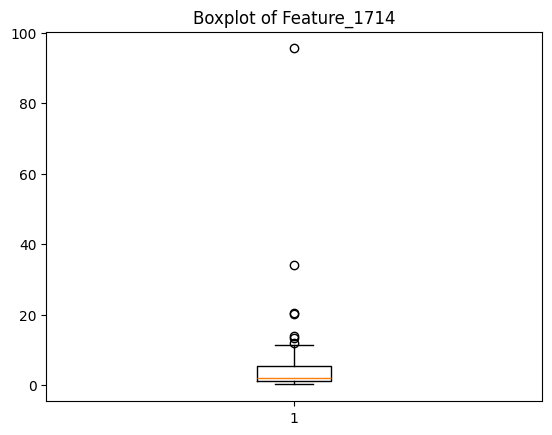

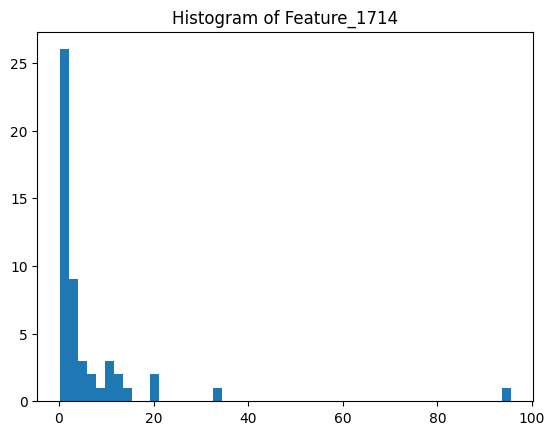

In [66]:
# The wide range of value can be seen on fearure 1714, lets visualize it 
plt.boxplot(test_data['Feature_1714'].dropna())
plt.title('Boxplot of Feature_1714')
plt.show()

plt.hist(test_data['Feature_1714'].dropna(), bins=50)
plt.title('Histogram of Feature_1714')
plt.show()


In [54]:
test_data.drop('Feature_1733', axis=1, inplace = True)